## Informasi Mahasiswa

Nama: Muhammad Farhan

NPM: 2108107010050



# Dataset

Source dataset: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

Dataset ini berisi 9568 titik data yang dikumpulkan dari Pembangkit Listrik Siklus Gabungan selama 6 tahun (2006-2011), ketika pembangkit listrik diatur untuk bekerja dengan beban penuh.  Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

# Library Yang Digunakan

In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

# Membaca dataset

In [39]:
# Baca dataset
df = pd.read_excel("dataset/power.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Preprocessing Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [41]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [42]:
#drop duplicate data
df.drop_duplicates(inplace=True)

#check duplicate data
df.duplicated().sum()

0

# Exploratory Data Analysis

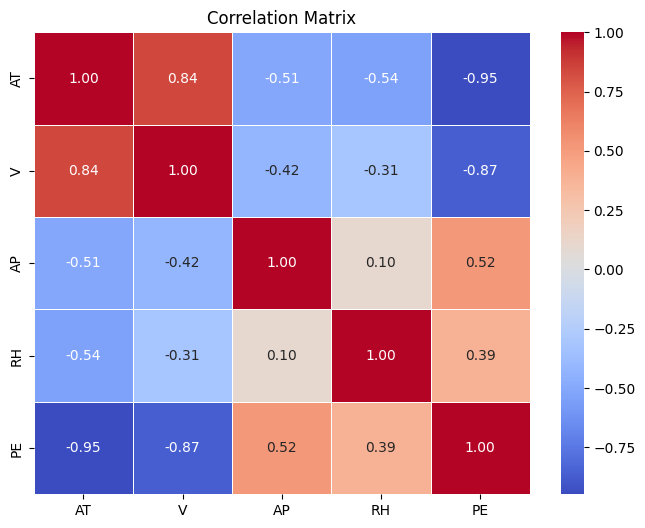

In [43]:
#check korelasi

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split dataset dan Normalisasi Data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = df[['AT']]  # Notice the double brackets to keep it as a DataFrame
y = df['PE']

# Scaling the data independent variable
X_scaled = scaler.fit_transform(X)  # Ensure X remains a 2D array after scaling
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


## Membangun Model


In [45]:
model = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

model.compile(optimizer='adam', loss='mean_squared_error')



In [46]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


239/239 [==============================] - 2s 4ms/step - loss: 0.3774 - val_loss: 0.1151
Epoch 2/100
239/239 [==============================] - 1s 4ms/step - loss: 0.1033 - val_loss: 0.0998
Epoch 3/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0950 - val_loss: 0.0951
Epoch 4/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0935
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0909 - val_loss: 0.0924
Epoch 6/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0900 - val_loss: 0.0914
Epoch 7/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0894 - val_loss: 0.0914
Epoch 8/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0890 - val_loss: 0.0906
Epoch 9/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0888 - val_loss: 0.0903
Epoch 10/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0887 - val_loss: 0.0906
E

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Convert continuous values to binary using a threshold (e.g., 0.5)
threshold = 0.5
y_test_binary = (y_test > threshold).astype(int)


In [49]:
from sklearn.metrics import accuracy_score

# Assuming y_pred contains the model's predictions
y_pred = model.predict(X_test)

# Convert predictions to labels (binary)
y_pred_labels = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_labels)

print(f"Test Accuracy: {accuracy:.4f}")


60/60 [==============================] - 0s 2ms/step
Test Accuracy: 0.9454


In [50]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

60/60 [==============================] - 0s 2ms/step - loss: 0.0902
Test Loss: 0.0902


In [51]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


191/191 [==============================] - 1s 3ms/step - loss: 0.0881 - val_loss: 0.0891
Epoch 2/150
191/191 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.0888
Epoch 3/150
191/191 [==============================] - 1s 4ms/step - loss: 0.0882 - val_loss: 0.0883
Epoch 4/150
191/191 [==============================] - 1s 4ms/step - loss: 0.0881 - val_loss: 0.0883
Epoch 5/150
191/191 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.0883
Epoch 6/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0881 - val_loss: 0.0894
Epoch 7/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0882 - val_loss: 0.0880
Epoch 8/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0882 - val_loss: 0.0881
Epoch 9/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0880 - val_loss: 0.0884
Epoch 10/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0881 - val_loss: 0.0884
E

Text(0.5, 1.0, 'Loss vs Val_Loss')

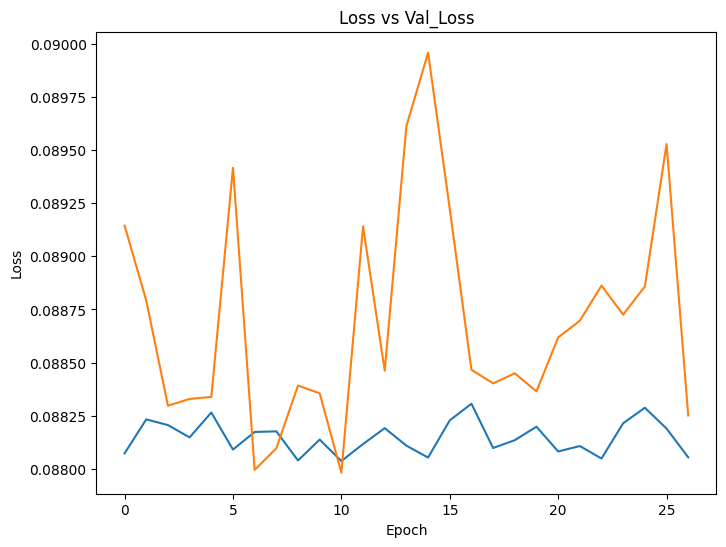

In [52]:
# plot loss dan val_loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Loss') # loss is the loss on the training set
plt.plot(history.history['val_loss'], label='Val_Loss') # val loss is the loss on the validation set
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Val_Loss')